In [5]:
import torch 
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

# 1. Load the dataset path
data_path = Path("Data_Bio/")
image_path = data_path / "Tarsiger"

print(image_path)

Data_Bio\Tarsiger


In [3]:
# 2. Set up the training and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test" 

train_dir, test_dir

(WindowsPath('Data_Bio/Tarsiger/train'), WindowsPath('Data_Bio/Tarsiger/test'))

Random image path: Data_Bio\Tarsiger\train\Tarsiger_indicus\t2.jpg
Image class: Tarsiger_indicus
Image height: 1365
Image width: 2048


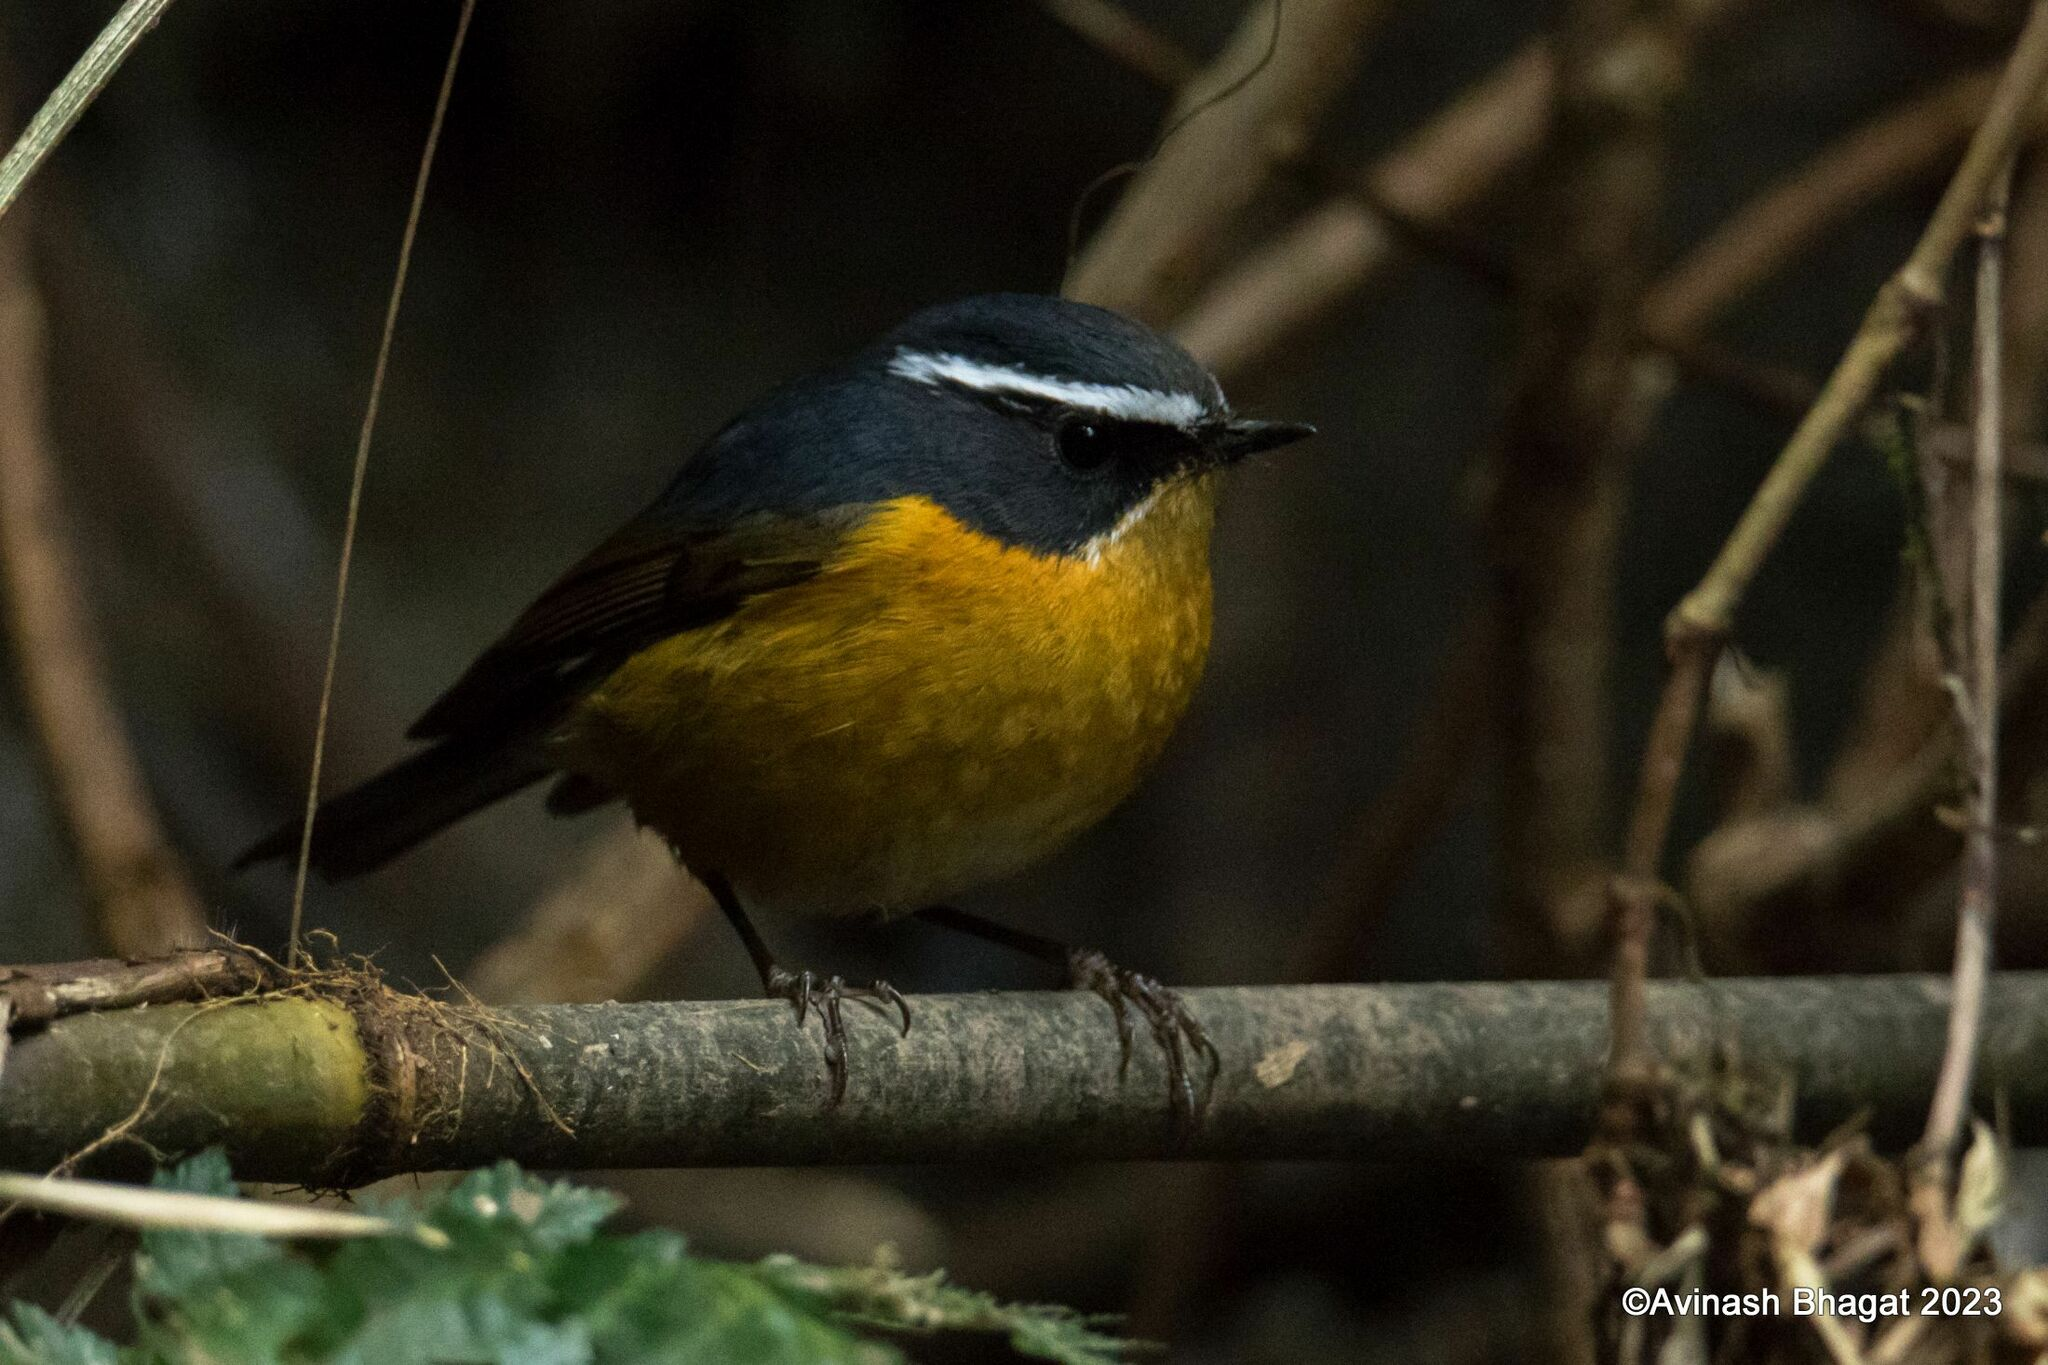

In [4]:
import random
from PIL import Image

# 3. Visualize an image 

# List all the images in the image_path
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Choose a random image
random_image_path = random.choice(image_path_list)

# Get the class of the image
image_class = random_image_path.parent.stem

# Open the image
img = Image.open(random_image_path)

# Display the image, class and shape
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

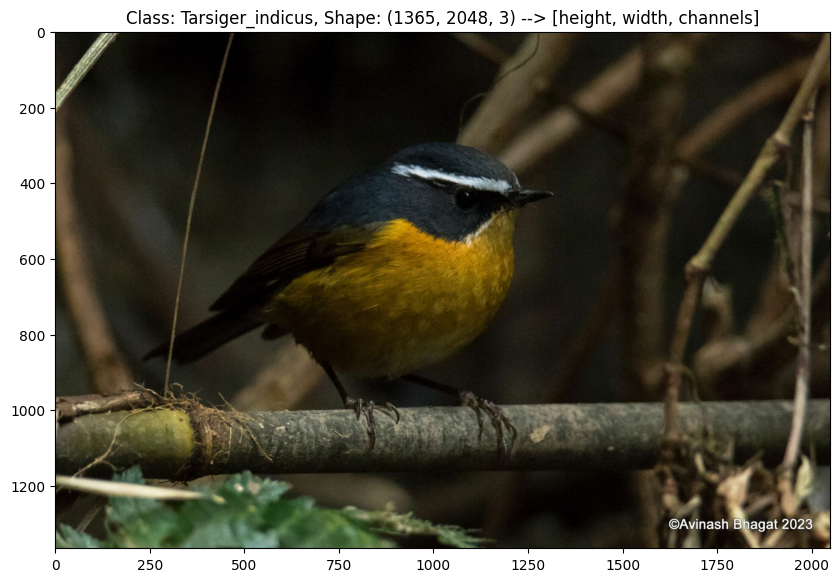

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the image to numpy array
img_to_array = np.asarray(img)

# Plot the image
plt.figure(figsize=(10,10)) # Set the size of the plot
plt.imshow(img_to_array) # Display the image
plt.title(f"Class: {image_class}, Shape: {img_to_array.shape} --> [height, width, channels]") # Set the title of the plot
plt.axis(True); # Turn off the axis

In [6]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [43]:
# 4. Transform the images to tesnors that PyTorch can work with it

data_transform = transforms.Compose([
    transforms.Resize((64, 64)), # Resize the image to 224 x 224 pixels
    transforms.RandomHorizontalFlip(p=0.5), # Randomly flip the image horizontally, probability of 0.5
    transforms.ToTensor() # Convert the image to a PyTorch Tensor
])

In [44]:
# 4. Let's create the dataset using the ImageFolder class
from torchvision import datasets

train_dataset = datasets.ImageFolder(root=train_dir, 
                                     transform=data_transform) 

test_dataset = datasets.ImageFolder(root=test_dir,
                                    transform=data_transform)

print(f"Train dataset: {train_dataset}, Test dataset: {test_dataset}")



Train dataset: Dataset ImageFolder
    Number of datapoints: 8
    Root location: Data_Bio\Tarsiger\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           ), Test dataset: Dataset ImageFolder
    Number of datapoints: 3
    Root location: Data_Bio\Tarsiger\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [45]:
# View the classes names
class_names = train_dataset.classes
class_names

['Tarsiger_hyperythrus', 'Tarsiger_indicus', 'Tarsiger_rufilatus']

In [10]:
# View the class indexes
class_indx = train_dataset.class_to_idx
class_indx

{'Tarsiger_hyperythrus': 0, 'Tarsiger_indicus': 1, 'Tarsiger_rufilatus': 2}

In [11]:
len(train_dataset), len(test_dataset)

(8, 3)

In [47]:
img, label = train_dataset[0][0], train_dataset[0][1]
# print(f"Image tensor:\n{img}")
# print(f"Image shape: {img.shape}")
# print(f"Image datatype: {img.dtype}")
# print(f"Image label: {label}")
# print(f"Label datatype: {type(label)}")
# print(f'Image class: {class_names[label]}')

The image shape before permute: torch.Size([3, 64, 64])
The image shape after permute: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'Class: Tarsiger_hyperythrus, Shape: torch.Size([64, 64, 3]), Original shape: torch.Size([3, 64, 64])')

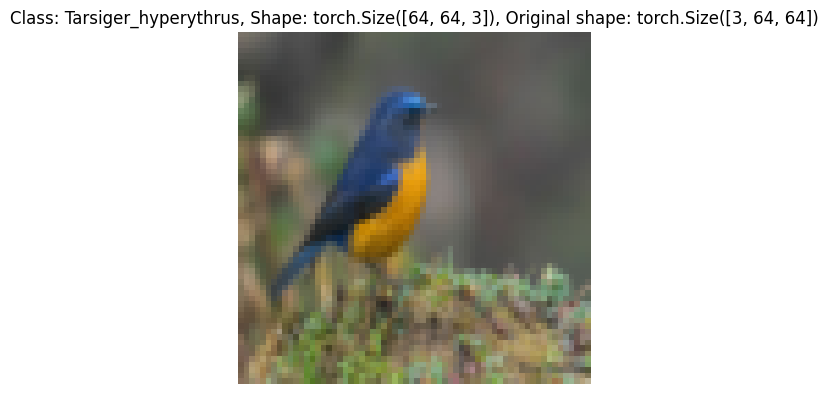

In [48]:
# img_permute = img.permute(1, 2, 0)

# print(f'The image shape before permute: {img.shape}')
# print(f'The image shape after permute: {img_permute.shape}')

# plt.figure(figsize=(10,10))
# plt.subplot(1,2,1)
# plt.imshow(img.permute(1,2,0))
# plt.axis(False)
# plt.title(f"Class: {class_names[label]}, Shape: {img_permute.shape}, Original shape: {img.shape}")


In [49]:
# 5. Create the DataLoader

train_dataloader = DataLoader(train_dataset, 
                    batch_size=1, 
                    shuffle=True)

test_dataloader = DataLoader(test_dataset,
                    batch_size=1,
                    shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x23462f06f40>,
 <torch.utils.data.dataloader.DataLoader at 0x23462f06ca0>)

In [71]:
# 6. Let's create the Model, my CNN model

from torch import nn

class CNN(nn.Module):
    def __init__(self, 
                input_shape:int, 
                hidden_units:int, 
                output_shape:int) -> None:
        super(CNN, self).__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                    out_channels=hidden_units, 
                    kernel_size=3, 
                    stride=1, 
                    padding=2),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=3,
                        stride=1))

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                        out_channels=hidden_units,
                        kernel_size=3,
                        stride=1,
                        padding=2),
            nn.MaxPool2d(kernel_size=3, 
                        stride=1),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= hidden_units*64*64, 
                    out_features = output_shape)
        )
    def forward(self, x):
        x = self.block_1(x)
        #print(f"Block 1 output shape: {x.shape}")
        x = self.block_2(x)
        #print(f"Block 2 output shape: {x.shape}")
        x = self.classifier(x)
        #print(f"Classifier output shape: {x.shape}")
        return x
    
# 7. Create the model instance
torch.manual_seed(42)

model_0 = CNN(input_shape=3, 
              hidden_units=10, 
              output_shape=len(train_dataset.classes))
    
model_0

CNN(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=40960, out_features=3, bias=True)
  )
)

In [69]:
model_0(torch.randn(1, 3, 64, 64))

Block 1 output shape: torch.Size([1, 10, 64, 64])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x40960 and 10x3)

In [17]:
img_batch, label_batch = next(iter(train_dataloader))

In [18]:
model_0(img_batch)

tensor([[-0.0012,  0.0098, -0.0018]], grad_fn=<AddmmBackward0>)

In [19]:
# 7. Train loop, test loop

def train_the_data(model: nn.Module, 
                dataloader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module, 
                optimizer: torch.optim.Optimizer): 
    
    # Set the model to training mode
    model.train()

    train_loss, train_accuracy = 0, 0 # Initialize the loss and accuracy

    for batch, (image, label) in enumerate(dataloader):

        y_pred = model(image) # Forward pass

        loss = loss_fn(y_pred, label)
        train_loss += loss.item()

        optimizer.zero_grad() # Zero the gradients

        loss.backward() # Backward pass

        optimizer.step() # Update the weights

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_accuracy += ((y_pred_class == label).sum().item()/len(y_pred))

    train_loss = train_loss/len(dataloader)
    train_accuracy = train_accuracy/len(dataloader)
    return train_loss, train_accuracy

def test_the_data(model: nn.Module,
                dataloader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module):
    model.eval()

    test_loss, test_accuracy = 0, 0

    with torch.inference_mode():
        for batch, (image, label) in enumerate(dataloader):

            test_pred_logits = model(image)

            loss = loss_fn(test_pred_logits, label)
            test_loss += loss.item()

            test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
            test_accuracy += ((test_pred_labels == label).sum().item()/len(test_pred_logits))

    test_loss = test_loss/len(dataloader)
    test_accuracy = test_accuracy/len(dataloader)
    return test_loss, test_accuracy



In [20]:
# 8. Let's make a fucntion combining the train and test loops

from tqdm.auto import tqdm

def train_and_evaluate(model: nn.Module,
                    train_dataloader: torch.utils.data.DataLoader,
                    test_dataloader: torch.utils.data.DataLoader,
                    optimizer: torch.optim.Optimizer,
                    loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
                    epochs: int = 5):
    results = {'train_loss': [], 'train_accuracy': [], 'test_loss': [], 'test_accuracy': []}

    for epoch in tqdm(range(epochs)):

        train_loss, train_accuracy = train_the_data(model=model, 
                                                    dataloader=train_dataloader, 
                                                    loss_fn=loss_fn, 
                                                    optimizer=optimizer)
        test_loss, test_accuracy = test_the_data(model=model, 
                                                dataloader=test_dataloader, 
                                                loss_fn=loss_fn)
        
        print(
        f"Epoch: {epoch+1} | "
        f"train_loss: {train_loss:.4f} | "
        f"train_acc: {train_accuracy:.4f} | "
        f"test_loss: {test_loss:.4f} | "
        f"test_acc: {test_accuracy:.4f}"
        )

        results['train_loss'].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results['train_accuracy'].append(train_accuracy.item() if isinstance(train_accuracy, torch.Tensor) else train_accuracy)
        results['test_loss'].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results['test_accuracy'].append(test_accuracy.item() if isinstance(test_accuracy, torch.Tensor) else test_accuracy)
        
    return results

In [72]:
torch.manual_seed(42)

EPOCHS = 7

model_0 = CNN(input_shape=3,
            hidden_units=10,
            output_shape=len(train_dataset.classes))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

model_0_results = train_and_evaluate(model=model_0,
                            train_dataloader=train_dataloader,
                            test_dataloader=test_dataloader,
                            optimizer=optimizer,
                            loss_fn=loss_fn,
                            epochs=EPOCHS)

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.4965 | train_acc: 0.2500 | test_loss: 2.1229 | test_acc: 0.3333
Epoch: 2 | train_loss: 0.8529 | train_acc: 0.7500 | test_loss: 1.4004 | test_acc: 0.3333
Epoch: 3 | train_loss: 0.9421 | train_acc: 0.5000 | test_loss: 1.0820 | test_acc: 0.3333
Epoch: 4 | train_loss: 0.7675 | train_acc: 0.7500 | test_loss: 1.0546 | test_acc: 0.6667
Epoch: 5 | train_loss: 0.5120 | train_acc: 0.8750 | test_loss: 1.2339 | test_acc: 0.3333
Epoch: 6 | train_loss: 0.3379 | train_acc: 1.0000 | test_loss: 1.2447 | test_acc: 0.3333
Epoch: 7 | train_loss: 0.4351 | train_acc: 0.8750 | test_loss: 0.8273 | test_acc: 0.6667


In [95]:
def make_predictions(model: torch.nn.Module, 
                     data: list):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [100]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_dataset), k=2): #k is the number of samples we want to take
    test_samples.append(sample)
    test_labels.append(label)

In [97]:
pred_probs= make_predictions(model=model_0, 
                             data=test_samples)

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1])

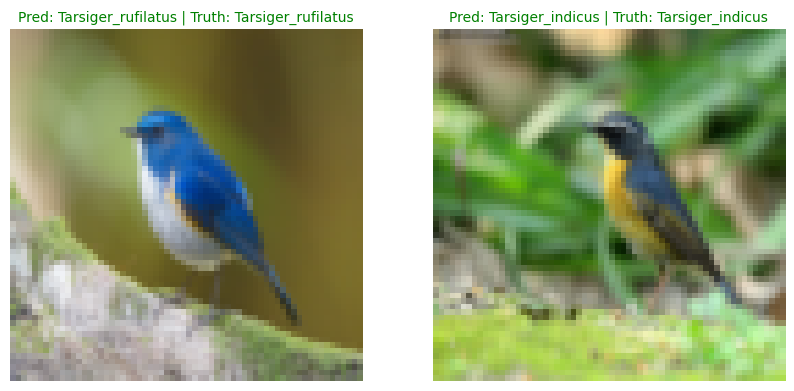

In [98]:
plt.figure(figsize=(10,10))
nrows = 1
ncols = 2
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  sample_permute = sample.permute(1, 2, 0)
  # Plot the target image
  plt.imshow(sample_permute.squeeze())

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False)